## Siegel-Veech Constants

We count the number of cylinders of circumference at most $L$ in a surface.

We start by creating a surface with [sage-flatsurf](https://github.com/flatsurf/sage-flatsurf).

In [1]:
from flatsurf import translation_surfaces
S = translation_surfaces.mcmullen_L(1, 1, 1, 1)

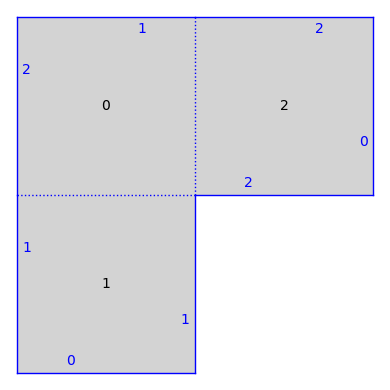

In [2]:
S.plot()

Decomposition of a surface into cylinders is implemented in [pyflatsurf](https://github.com/flatsurf/flatsurf). We triangulate our surface and make sure that its vertices are singularities.

In [3]:
from flatsurf.geometry.pyflatsurf_conversion import to_pyflatsurf
S = to_pyflatsurf(S)
S = S.eliminateMarkedPoints().surface()

We will iterate over all directions coming from saddle connections of length at most L (ignoring connections that have the same slope.)

In [4]:
L = 16R

directions = S.connections().bound(L).slopes()

For each direction we want to compute a decomposition into cylinders and minimal components. Note that sometimes our algorithm cannot decide whether a component is minimal. However, this is not an issue here: we can stop the decomposition process when a component has become so stretched out that it has no hope of producing a cylinder of circumference $≤L$ anymore.

Here we define the target of the decomposition, i.e., a predicate that determines when a decomposition of a component can be stopped:

In [5]:
def target(component):
    if component.cylinder():
        # This component is a cylinder. No further decomposition needed.
        return True
    if component.withoutPeriodicTrajectory():
        # This component is minimal. Further decomposition will not produce any cylinders.
        return True

    height = component.height()
    
    # This height bounds the size of any cylinder. However, it is stretched by the length of the vector
    # defining the vertical direction. (That vector is not normalized because that is hard to do in
    # general rings…)
    bound = (height * height) / pyflatsurf.flatsurf.Bound.upper(vertical.vertical()).squared()
    return bound > L

Now we perform the actual decomposition and collect the cylinders of circumference $≤L$:

In [6]:
circumferences = []

for direction in directions:
    from pyflatsurf import flatsurf
    decomposition = flatsurf.makeFlowDecomposition(S, direction.vector())
    decomposition.decompose(target)
    for component in decomposition.components():
        if component.cylinder():
            circumference = component.circumferenceHolonomy()
            if circumference > L:
                continue
            circumferences.append(circumference)

We will plot a histogram of all the cylinders that we found ordered by their length. It would be easy to plot this differently, weighted by the area, …

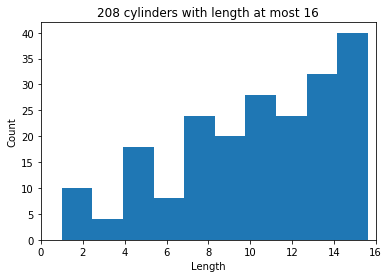

In [7]:
lengths = [sqrt(float(v.x())**2 + float(v.y())**2) for v in circumferences]

import matplotlib.pyplot as plot
_ = plot.hist(lengths)
_ = plot.xlim(0, L)
_ = plot.title(f"{len(circumferences)} cylinders with length at most {L}")
_ = plot.xlabel('Length')
_ = plot.ylabel('Count')